<a href="https://colab.research.google.com/github/valyaler/innopolis/blob/master/DZ_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Контекст задачи:**

Даны варианты А и В некой базы с показателями 0 и 1, нам необходимо определить более эффективный из них 

**Формулировка гипотезы:**

Н0: p(a)=p(b)

H1: p(a)!=p(b)

где p(a) и p(b) означают соответственно конверсии старого и нового варианта.
Уровень доверия установим в 95%

In [22]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt
from google.colab import drive
import statsmodels.stats.proportion as proportion
from statsmodels.stats.proportion import proportions_ztest, proportion_confint



<a id='2'></a>
### Подгрузим датасет

In [23]:
data=pd.read_csv('ad.csv')
data.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


будем считать А начальным вариантом,  В изменненым, значение 0 как просмотр, 1- покупка

Посчитаем кол-во '1' и кол-во посетителей в каждом варианте

Выведем z-stat и pval 

Кол-во покупок в группе A: 304
Кол-во покупок в группе B: 372
Кол-во посетителей в группе А: 1000
Кол-во посетителей в группе B: 1000


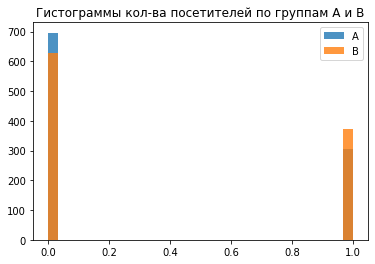

z_stat: -3.2144492244084213
p-value: 0.0013069502732125403
т.к. pval<0.05 , то разница в группах A и B статистически значима

Для расчета доверительных интервалов используем метод proportion_confint:
Доверительный интервал для группы А: 0.2754905064387712 - 0.3325094935612288
Доверительный интервал для группы В: 0.3420429266473629 - 0.4019570733526371
промежуточный выводы:

в результате варианта В, можно ждать улучшений до 40% от 30% варианта А


In [31]:
print('Кол-во покупок в группе A: {}\n'
      'Кол-во покупок в группе B: {}'.format(data[data['ad_id']=='A']['action'].sum(), 
                                                 data[data['ad_id']=='B']['action'].sum()))
purchasesA = len(data[data['ad_id']=='A']['action'])
purchasesB = len(data[data['ad_id']=='B']['action'])
print('Кол-во посетителей в группе А: {}'.format(purchasesA))
print('Кол-во посетителей в группе B: {}'.format(purchasesB))
plt.hist(data[data['ad_id']=='A']['action'], alpha = 0.8, label='A', bins = 30)
plt.hist(data[data['ad_id']=='B']['action'], alpha = 0.8, label='B', bins = 30)
plt.legend()
plt.title('Гистограммы кол-ва посетителей по группам A и B')
plt.show()
z_stat , pval = proportions_ztest((data[data['ad_id']=='A']['action'].sum(),data[data['ad_id']=='B']['action'].sum())
,(data[data['ad_id']=='A']['action'].count(),data[data['ad_id']=='B']['action'].count()))
alpha = 0.05
print('z_stat:',z_stat)
print('p-value:',pval)
if pval < alpha:
    print('т.к. pval<0.05 , то разница в группах A и B статистически значима\n')
else:
    print('т.к. pval>0.05, то разница в группах A и B статистически НЕ значима\n')

print('Для расчета доверительных интервалов используем метод proportion_confint:')
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint((data[data['ad_id']=='A']['action'].sum()
,data[data['ad_id']=='B']['action'].sum())
,nobs=(data[data['ad_id']=='A']['action'].count(),data[data['ad_id']=='B']['action'].count()),alpha=alpha)
print('Доверительный интервал для группы А:', lower_con, '-', upper_con)
print('Доверительный интервал для группы В:', lower_test, '-', upper_test)
print('промежуточный выводы:\n')
print('в результате варианта В, можно ждать улучшений до 40% от 30% варианта А') 